In [2]:
import pandas as pd
import numpy as np
import torch

In [16]:
a = torch.load("/data/yaoms/model/MIL_weights/best_paiyin.pth")

In [17]:
a['best_paiyin'], a['epoch']

(0.7142857142857143, 23)

In [18]:
b = torch.load("/data/yaoms/model/MIL_weights/best_acc.pth")
b['epoch'], b['best_acc']

(26, 0.9125)

In [19]:
c = torch.load("/data/yaoms/model/MIL_weights/min_loss.pth")
c['epoch'], c['min_loss']

(24, 0.021305885280497254)

In [15]:
d = torch.load("/data/yaoms/model/MIL_weights/checkpoint_best0819.pth")
d['epoch'], d['best_paiyin']

(7, 0.8095238095238095)

In [39]:
df = pd.read_csv("/home/yaoms/MIL_TCT/predictions.csv")
result = np.array(df)

In [40]:
df

,file,target,prediction,probability
0,0,1,1,0.999078
1,1,1,1,0.996221
2,2,1,1,0.897258
3,3,1,1,0.995513
4,4,1,1,0.985111
5,5,1,1,0.999566
6,6,1,1,0.989979
7,7,1,1,0.998474
8,8,1,1,0.996851
9,9,1,1,0.981137


In [41]:
from __future__ import division

fpr = []
tpr = []
acc = []
for thr in [-1,0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.9,0.95,0.98,0.99,1,1.1]:
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(result)):
        label = result[i][1]
#         if label > 0:
#             label = 1
        prob = result[i][3]
        if prob > thr:
            pred = 1
        else:
            pred = 0
        if label == 1 and pred == 1:
            tp +=1
        elif label == 0 and pred == 0:
            tn +=1
        elif label == 1 and pred == 0:
            fn +=1
        elif label == 0 and pred == 1:
            fp +=1
    tpr.append(tp/(tp+fn))
    fpr.append(fp/(fp+tn))
    acc.append((tp+tn)/(tp+fp+tn+fn))

In [42]:
print(fpr)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.037037037037037035, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [43]:
print(tpr)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9545454545454546, 0.9545454545454546, 0.9318181818181818, 0.7954545454545454, 0.0, 0.0]


In [44]:
from sklearn.metrics import roc_curve,auc
roc_auc = auc(fpr,tpr)
roc_auc

1.0

In [45]:
acc

[0.6197183098591549,
 0.6197183098591549,
 0.6197183098591549,
 0.6197183098591549,
 0.6197183098591549,
 0.6197183098591549,
 0.6197183098591549,
 0.6197183098591549,
 0.9859154929577465,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.971830985915493,
 0.971830985915493,
 0.9577464788732394,
 0.8732394366197183,
 0.38028169014084506,
 0.38028169014084506]

<Figure size 432x288 with 0 Axes>

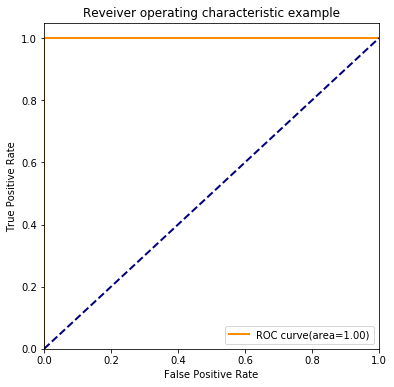

In [47]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color="darkorange",
         lw=lw,label="ROC curve(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reveiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()